EDA general

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# ==========================================
#  🏀 EDA GENERAL - DATOS NBA
# ==========================================

import pandas as pd

# --- 1️⃣ Cargar archivos CSV ---
player_info = pd.read_csv('C:/Users/Fernando/OneDrive/SoyHenry/Proyecto final/Dataset_NBA/common_player_info.csv')
draft_combine = pd.read_csv("C:/Users/Fernando/OneDrive/SoyHenry/Proyecto final/Dataset_NBA/draft_combine_stats.csv")
draft_history = pd.read_csv("C:/Users/Fernando/OneDrive/SoyHenry/Proyecto final/Dataset_NBA/draft_history.csv")
game = pd.read_csv("C:/Users/Fernando/OneDrive/SoyHenry/Proyecto final/Dataset_NBA/game.csv")

# --- 2️⃣ Función general para revisar cada dataset ---
def eda_general(df, nombre):
    resumen = {}
    resumen["Dataset"] = nombre
    resumen["Filas"] = df.shape[0]
    resumen["Columnas"] = df.shape[1]
    resumen["Duplicados"] = df.duplicated().sum()
    resumen["Valores_Nulos (%)"] = round(df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100, 2)
    resumen["Valores_Vacios (%)"] = round(df.applymap(lambda x: isinstance(x, str) and x.strip() == "").sum().sum() / (df.shape[0] * df.shape[1]) * 100, 2)
    resumen["Tipos_Datos"] = df.dtypes.value_counts().to_dict()
    resumen["Valores_Únicos_Promedio"] = int(df.nunique().mean())
    return resumen

# --- 3️⃣ Aplicar función a cada archivo ---
eda_general_resultados = pd.DataFrame([
    eda_general(player_info, "common_player_info"),
    eda_general(draft_combine, "draft_combine_stats"),
    eda_general(draft_history, "draft_history"),
    eda_general(game, "game")
])

# --- 4️⃣ Mostrar resultados ---
print("\n📊 RESUMEN GENERAL DE LOS DATASETS NBA\n")
print(eda_general_resultados.to_string(index=False))

# --- 5️⃣ Guardar resultados en un Excel ---
ruta_salida = "C:/Users/Fernando/OneDrive/SoyHenry/Proyecto final/Dataset_NBA/EDA_general_resultados.xlsx"
eda_general_resultados.to_excel(ruta_salida, index=False)

print(f"\n✅ Archivo Excel guardado en:\n{ruta_salida}")


C:\Users\Fernando\AppData\Local\Temp\ipykernel_4088\3362457888.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  resumen["Valores_Vacios (%)"] = round(df.applymap(lambda x: isinstance(x, str) and x.strip() == "").sum().sum() / (df.shape[0] * df.shape[1]) * 100, 2)
C:\Users\Fernando\AppData\Local\Temp\ipykernel_4088\3362457888.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  resumen["Valores_Vacios (%)"] = round(df.applymap(lambda x: isinstance(x, str) and x.strip() == "").sum().sum() / (df.shape[0] * df.shape[1]) * 100, 2)
C:\Users\Fernando\AppData\Local\Temp\ipykernel_4088\3362457888.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  resumen["Valores_Vacios (%)"] = round(df.applymap(lambda x: isinstance(x, str) and x.strip() == "").sum().sum() / (df.shape[0] * df.shape[1]) * 100, 2)
C:\Users\Fernando\AppData\Local\Temp\ipykernel_4088\3362457888.py:21: FutureWarnin


📊 RESUMEN GENERAL DE LOS DATASETS NBA

            Dataset  Filas  Columnas  Duplicados  Valores_Nulos (%)  Valores_Vacios (%)                         Tipos_Datos  Valores_Únicos_Promedio
 common_player_info   4171        33           0               3.26                0.01  {object: 27, float64: 4, int64: 2}                     1057
draft_combine_stats   1202        47           0              49.89                0.00 {object: 31, float64: 14, int64: 2}                      134
      draft_history   7990        14           0               0.03                0.00               {int64: 7, object: 7}                     1217
               game  65698        55           0              11.98                0.00 {float64: 36, object: 10, int64: 9}                     1606

✅ Archivo Excel guardado en:
C:/Users/Fernando/OneDrive/SoyHenry/Proyecto final/Dataset_NBA/EDA_general_resultados.xlsx


1 EDA - common_player_info.csv



🏀 EDA - common_player_info

               age       weight
count  4171.000000  4071.000000
mean     58.854939   211.133382
std      23.807809    26.926082
min      21.949350   133.000000
25%      38.190281   190.000000
50%      56.566735   210.000000
75%      75.060917   230.000000
max     125.826146   360.000000


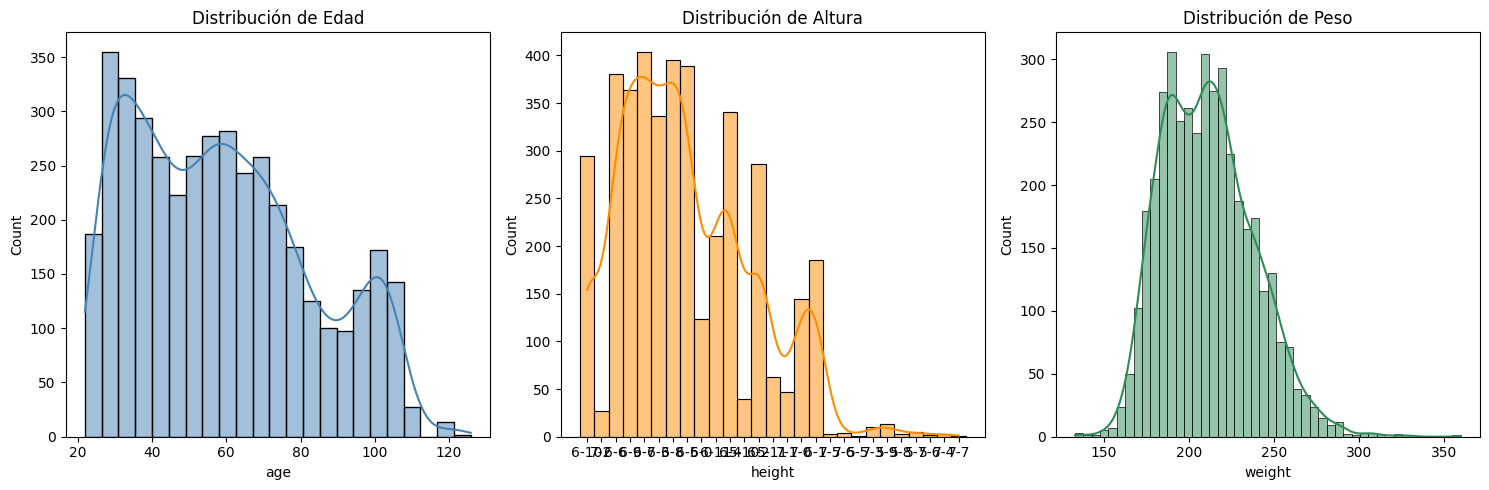

C:\Users\Fernando\AppData\Local\Temp\ipykernel_18888\2929119714.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


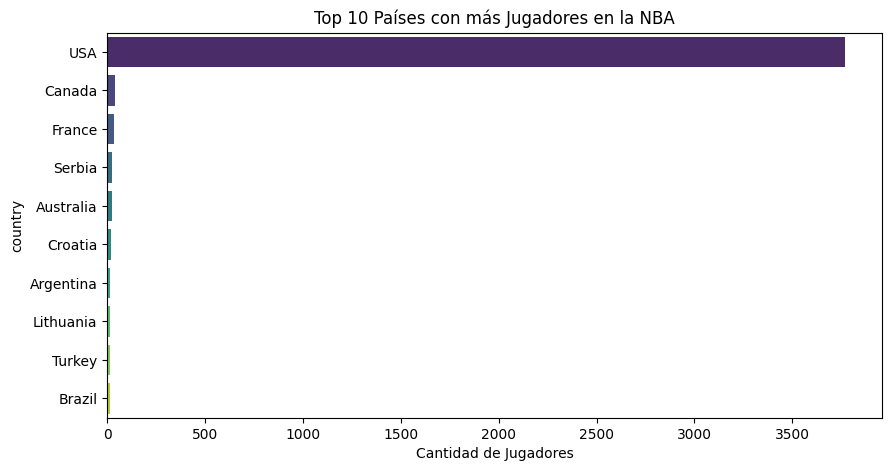

In [3]:

print("\n\n🏀 EDA - common_player_info\n")

# Convertir fechas y crear edad
player_info["birthdate"] = pd.to_datetime(player_info["birthdate"], errors='coerce')
player_info["age"] = (pd.Timestamp("today") - player_info["birthdate"]).dt.days / 365.25

# Estadísticas descriptivas
print(player_info[["age", "height", "weight"]].describe())

# Distribución de edad, altura y peso
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(player_info["age"], kde=True, ax=axes[0], color="steelblue")
axes[0].set_title("Distribución de Edad")

sns.histplot(player_info["height"], kde=True, ax=axes[1], color="darkorange")
axes[1].set_title("Distribución de Altura")

sns.histplot(player_info["weight"], kde=True, ax=axes[2], color="seagreen")
axes[2].set_title("Distribución de Peso")
plt.tight_layout()
plt.show()

# Conteo de jugadores por país y universidad
plt.figure(figsize=(10,5))
top_countries = player_info["country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Países con más Jugadores en la NBA")
plt.xlabel("Cantidad de Jugadores")
plt.show()

In [ ]:
'''La edad se calculó restando el año actual completo (por ejemplo, 2025 - año_nacimiento), sin tener en cuenta el mes/día, lo cual introduce errores.

El dataset incluye jugadores históricos (desde los años 1940 o 1950).
Entonces, si calculaste edad respecto a hoy, muchos ya son exjugadores o incluso fallecidos, y por eso aparecen edades de 70, 80 o más años.

👉 Por ejemplo:

Un jugador que debutó en 1960, nacido en 1938, hoy tendría 87 años.

Si hay registros de jugadores de todas las épocas, el promedio sube mucho.'''

2 EDA - draft_combine_stats.csv



💪 EDA - draft_combine_stats


Columnas con más nulos:
 off_drib_college_break_right    0.974210
off_drib_college_top_key        0.974210
spot_fifteen_corner_left        0.938436
spot_fifteen_break_left         0.936772
spot_fifteen_top_key            0.936772
spot_fifteen_break_right        0.936772
spot_fifteen_corner_right       0.936772
off_drib_college_break_left     0.908486
on_move_college                 0.903494
on_move_fifteen                 0.876872
dtype: float64

Variables numéricas disponibles: ['season', 'player_id', 'height_wo_shoes', 'height_w_shoes', 'weight', 'wingspan', 'standing_reach', 'body_fat_pct', 'hand_length', 'hand_width', 'standing_vertical_leap', 'max_vertical_leap', 'lane_agility_time', 'modified_lane_agility_time', 'three_quarter_sprint', 'bench_press']
                             count          mean           std      min  \
season                      1202.0  2.012537e+03  6.561620e+00  2001.00   
player_id                   1202.0  2.350133e+06  5

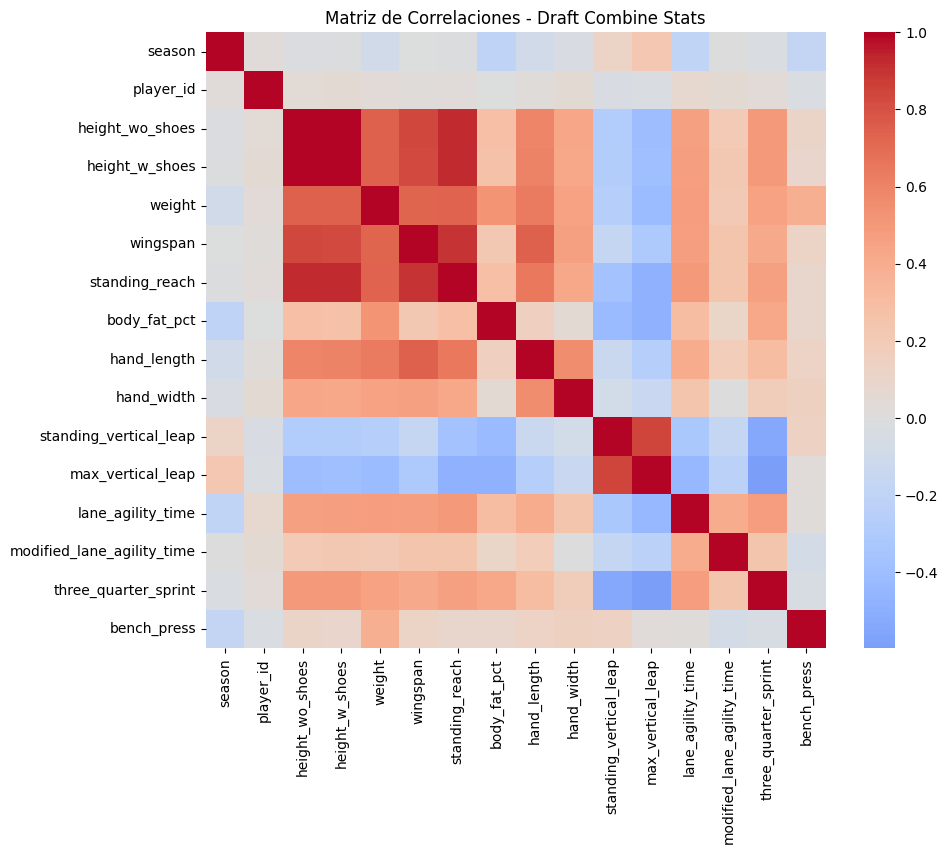

C:\Users\Fernando\AppData\Local\Temp\ipykernel_18888\2293358668.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=draft_combine, x="position", y="height_wo_shoes", palette="Set3")


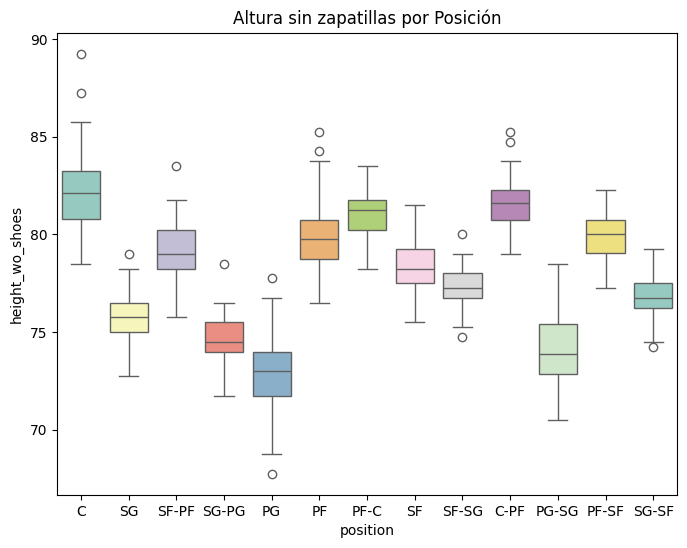

In [4]:
print("\n\n💪 EDA - draft_combine_stats\n")

# Analizar completitud
nulos = draft_combine.isna().mean().sort_values(ascending=False)
print("\nColumnas con más nulos:\n", nulos.head(10))

# Selección de variables numéricas relevantes
num_cols = draft_combine.select_dtypes(include=np.number).columns
print("\nVariables numéricas disponibles:", list(num_cols))

# Estadísticas descriptivas
print(draft_combine[num_cols].describe().T)

# Correlación entre variables físicas
plt.figure(figsize=(10, 8))
sns.heatmap(draft_combine[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Matriz de Correlaciones - Draft Combine Stats")
plt.show()

# Comparaciones por posición (ejemplo: altura vs vertical)
plt.figure(figsize=(8,6))
sns.boxplot(data=draft_combine, x="position", y="height_wo_shoes", palette="Set3")
plt.title("Altura sin zapatillas por Posición")
plt.show()

3 EDA - draft_history.csv



📜 EDA - draft_history



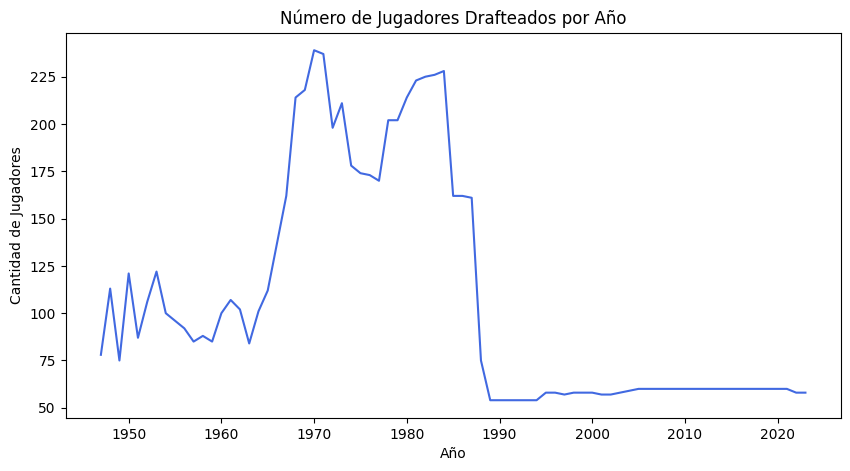

C:\Users\Fernando\AppData\Local\Temp\ipykernel_4088\3963830735.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")


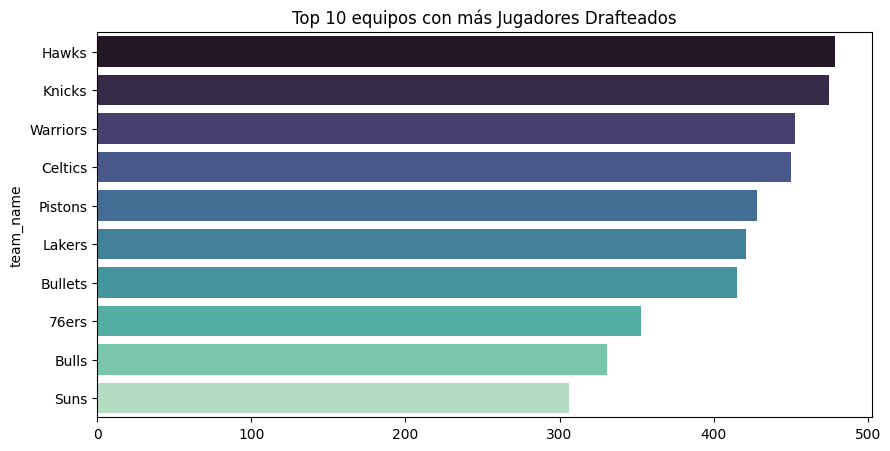

C:\Users\Fernando\AppData\Local\Temp\ipykernel_4088\3963830735.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_picks.values, y=top_picks.index, palette="crest")


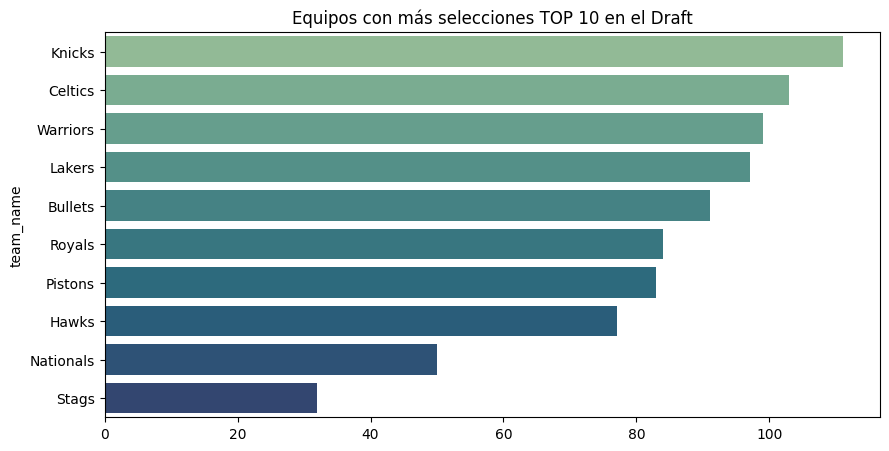

C:\Users\Fernando\AppData\Local\Temp\ipykernel_4088\3963830735.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_schools.values, y=top_schools.index, palette="flare")


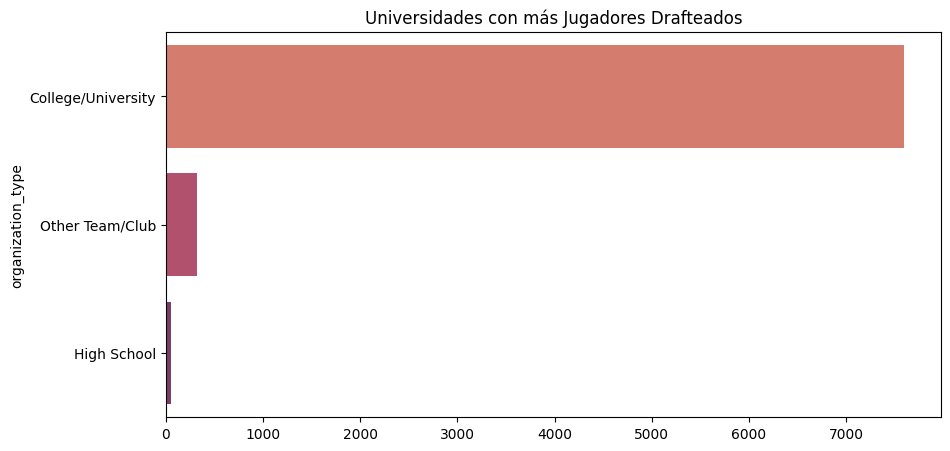

In [6]:

print("\n\n📜 EDA - draft_history\n")

# Análisis temporal: jugadores drafteados por año
draft_per_year = draft_history["season"].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=draft_per_year.index, y=draft_per_year.values, color="royalblue")
plt.title("Número de Jugadores Drafteados por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Jugadores")
plt.show()

# equipos con más jugadores drafteados
top_countries = draft_history["team_name"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title("Top 10 equipos con más Jugadores Drafteados")
plt.show()

# Equipos con más selecciones altas (top 10)
top_picks = draft_history[draft_history["overall_pick"] <= 10]["team_name"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_picks.values, y=top_picks.index, palette="crest")
plt.title("Equipos con más selecciones TOP 10 en el Draft")
plt.show()

# Universidades más frecuentes
top_schools = draft_history["organization_type"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_schools.values, y=top_schools.index, palette="flare")
plt.title("Universidades con más Jugadores Drafteados")
plt.show()

4 EDA - game.csv



🕹️ EDA - game

                count          mean           std          min           25%  \
season_id     65698.0  2.294934e+04  5.000306e+03     12005.00  2.198100e+04   
team_id_home  65698.0  1.609926e+09  3.324313e+07        45.00  1.610613e+09   
game_id       65698.0  2.584747e+07  6.303760e+06  10500001.00  2.130053e+07   
min           65698.0  2.210035e+02  6.790352e+01         0.00  2.400000e+02   
fgm_home      65685.0  3.967227e+01  6.770802e+00         4.00  3.500000e+01   
fga_home      50251.0  8.399280e+01  9.164445e+00         0.00  7.800000e+01   
fg_pct_home   50208.0  4.673210e-01  5.942344e-02         0.14  4.270000e-01   
fg3m_home     52480.0  5.735099e+00  4.537337e+00         0.00  2.000000e+00   
fg3a_home     47015.0  1.774115e+01  1.054581e+01         0.00  1.000000e+01   
fg3_pct_home  46624.0  3.461360e-01  1.512336e-01         0.00  2.610000e-01   

                       50%           75%           max  
season_id     2.199700e+04  2.201100e+04  4.2

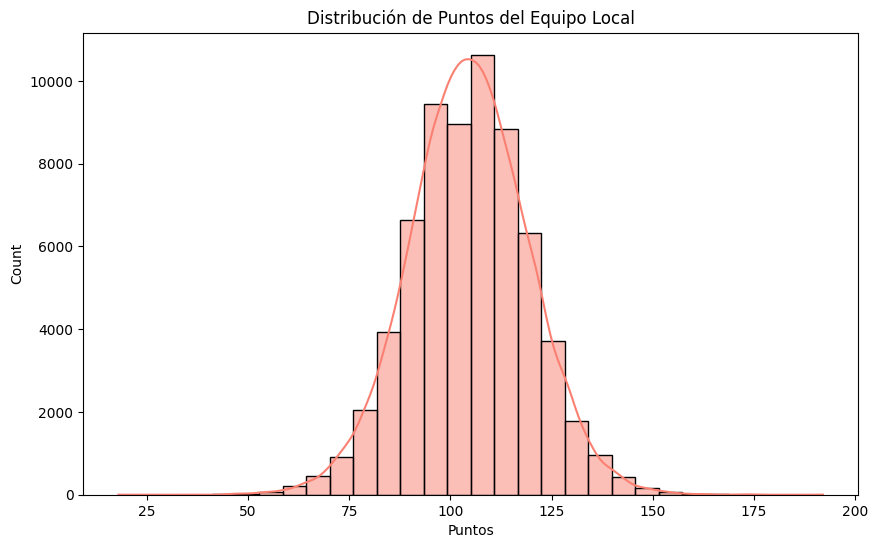

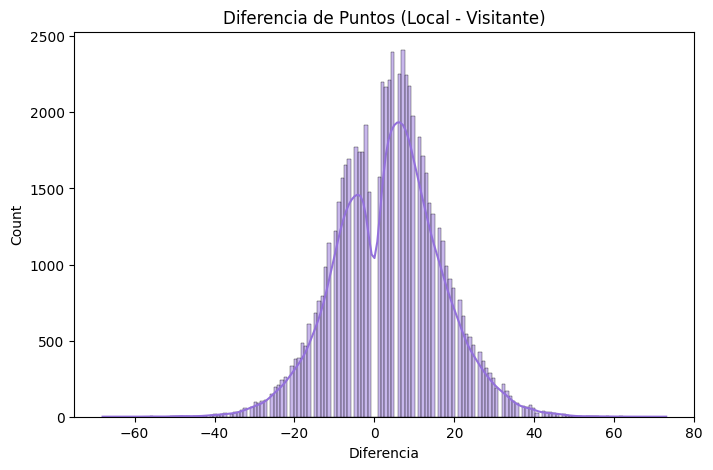

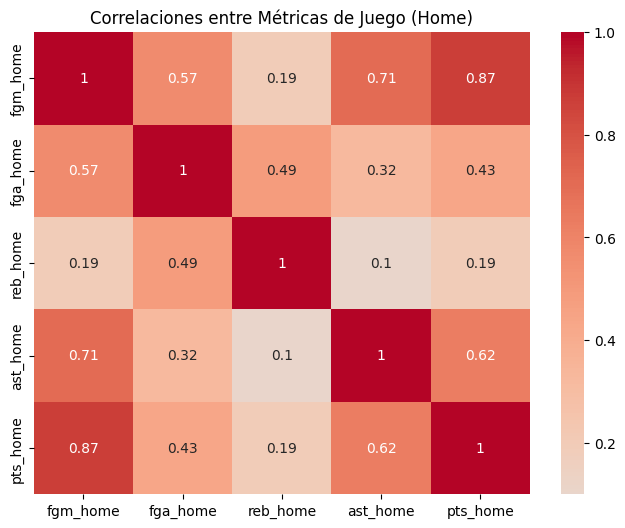

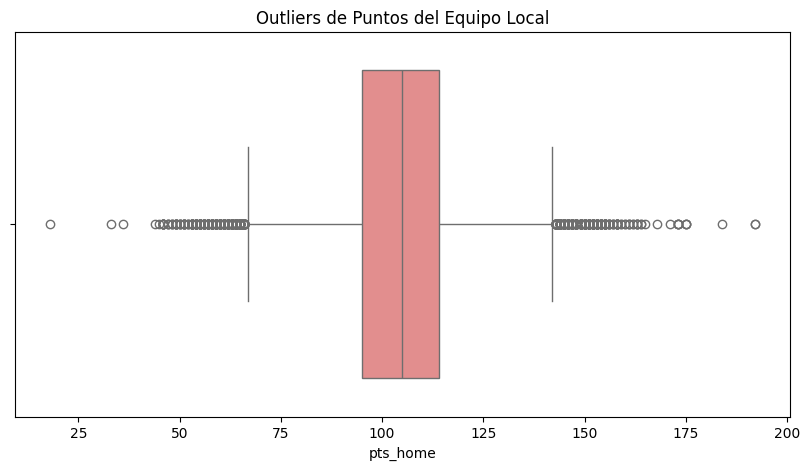


✅ EDA COMPLETO FINALIZADO.


In [7]:

print("\n\n🕹️ EDA - game\n")

# Revisar estadísticas numéricas
num_cols_game = game.select_dtypes(include=np.number).columns
print(game[num_cols_game].describe().T.head(10))

# Distribución de puntos por equipo (local)
plt.figure(figsize=(10,6))
sns.histplot(game["pts_home"], bins=30, kde=True, color="salmon")
plt.title("Distribución de Puntos del Equipo Local")
plt.xlabel("Puntos")
plt.show()

# Diferencia promedio local vs visitante
game["diff_pts"] = game["pts_home"] - game["pts_away"]
plt.figure(figsize=(8,5))
sns.histplot(game["diff_pts"], kde=True, color="mediumpurple")
plt.title("Diferencia de Puntos (Local - Visitante)")
plt.xlabel("Diferencia")
plt.show()

# Correlación entre métricas clave
metrics = ["fgm_home", "fga_home", "reb_home", "ast_home", "pts_home"]
plt.figure(figsize=(8,6))
sns.heatmap(game[metrics].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlaciones entre Métricas de Juego (Home)")
plt.show()

# Identificación de outliers (puntos)
plt.figure(figsize=(10,5))
sns.boxplot(x=game["pts_home"], color="lightcoral")
plt.title("Outliers de Puntos del Equipo Local")
plt.show()

print("\n✅ EDA COMPLETO FINALIZADO.")